In [ ]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('sales_data.csv')

First 5 rows of the dataset:


,OrderDate,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,2011-01-04T00:00:00.000Z,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,2011-01-06T00:00:00.000Z,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrderDate            9994 non-null   object 
 1   Category             9994 non-null   object 
 2   City                 9994 non-null   object 
 3   Country              9994 non-null   object 
 4   CustomerName         9994 non-null   object 
 5   Discount             9994 non-null   float64
 6   OrderID              9994 non-null   object 
 7   PostalCode           9994 non-null   int64  
 8   ProductName          9994 non-null   object 
 9   Profit               9994 non-null   int64  
 10  Quantity             9994 non-null   int64  
 11  Region               9994 non-null   object 
 12  Sales                9994 non-null   int64  
 13  Segment              9994 non-null   object 
 14  ShipDate             9994 non-null   object 
 15  ShipMode        

,Discount,PostalCode,Profit,Quantity,Sales,DaystoShipActual,SalesForecast,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,0.0,9994.000000,9994.000000,0.0,9994.000000,9994.000000
mean,0.156203,55190.379428,28.651891,3.789574,229.873324,3.958875,301.200620,4.320692,NaN,229.857992,12.037092,NaN,37.787222,-94.360212
std,0.206452,32063.693350,234.255712,2.225110,623.248946,1.747097,816.700059,2.176059,NaN,623.245119,46.677878,NaN,4.884539,18.058618
min,0.000000,1040.000000,-6600.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.440000,-275.000000,NaN,25.476600,-123.099800
25%,0.000000,23223.000000,2.000000,2.000000,17.000000,3.000000,23.000000,3.000000,NaN,17.280000,7.500000,NaN,34.011600,-117.252100
50%,0.200000,56430.500000,9.000000,3.000000,54.500000,4.000000,71.000000,6.000000,NaN,54.490000,27.000000,NaN,38.790200,-87.761150
75%,0.200000,90008.000000,29.000000,5.000000,210.000000,5.000000,275.000000,6.000000,NaN,209.940000,36.300000,NaN,40.801100,-77.394800
max,0.800000,99301.000000,8400.000000,14.000000,22638.000000,7.000000,29665.000000,6.000000,NaN,22638.480000,50.000000,NaN,48.797400,-68.791800


Number of duplicate rows: 1
Missing values before cleaning:
OrderDate                 0
Category                  0
City                      0
Country                   0
CustomerName              0
Discount                  0
OrderID                   0
PostalCode                0
ProductName               0
Profit                    0
Quantity                  0
Region                    0
Sales                     0
Segment                   0
ShipDate                  0
ShipMode                  0
State                     0
Sub_Category              0
DaystoShipActual          0
SalesForecast             0
ShipStatus                0
DaystoShipScheduled       0
OrderProfitable        9993
SalesperCustomer          0
ProfitRatio               0
SalesaboveTarget       9993
latitude                  0
longitude                 0
dtype: int64
Missing values after cleaning:
OrderDate                 0
Category                  0
City                      0
Country                   0


,OrderDate,Category,City,Country,CustomerName,Discount,OrderID,PostalCode,ProductName,Profit,...,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,OrderProfitable,SalesperCustomer,ProfitRatio,SalesaboveTarget,latitude,longitude
0,2011-01-04T00:00:00.000Z,Office Supplies,Houston,United States,Darren Powers,0.2,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",6,...,4,22,Shipped Early,6,NaN,16.45,33.8,NaN,29.8941,-95.6481
1,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,Avery 508,4,...,4,15,Shipped Early,6,NaN,11.78,36.3,NaN,41.7662,-88.1410
2,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.8,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,-5,...,4,5,Shipped Early,6,NaN,3.54,-155.0,NaN,41.7662,-88.1410
3,2011-01-05T00:00:00.000Z,Office Supplies,Naperville,United States,Phillina Ober,0.2,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,-65,...,4,357,Shipped Early,6,NaN,272.74,-23.8,NaN,41.7662,-88.1410
4,2011-01-06T00:00:00.000Z,Office Supplies,Philadelphia,United States,Mick Brown,0.2,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,5,...,7,26,Shipped Late,6,NaN,19.54,25.0,NaN,39.9448,-75.2288


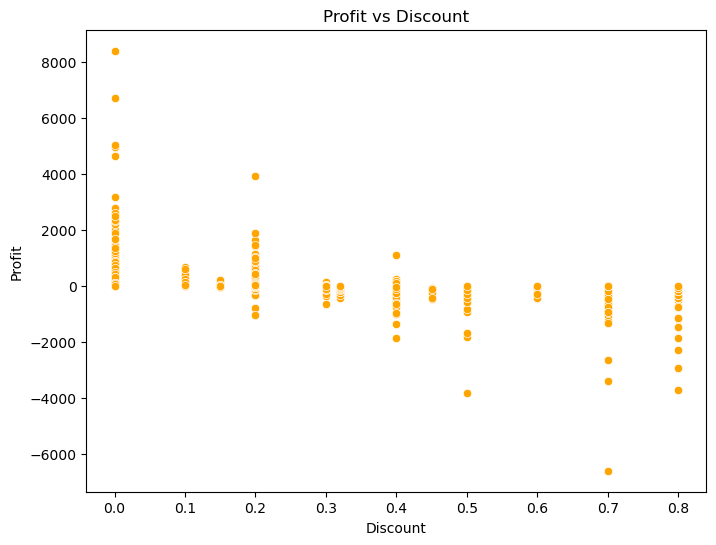

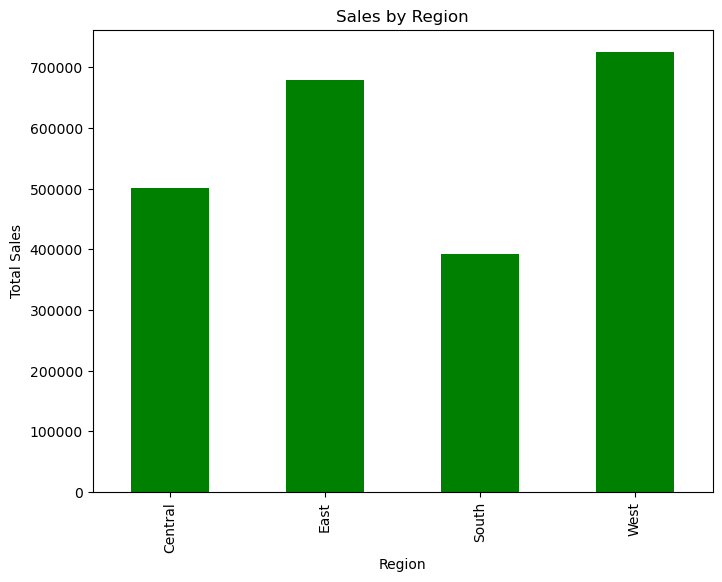

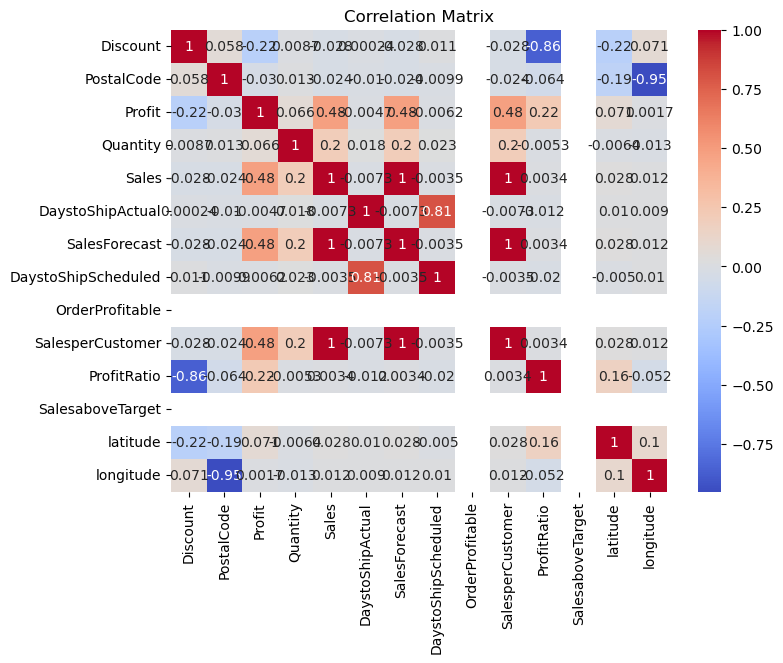

Mean Squared Error: 205779.60
R² Score: 0.46
Model Training Complete


In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nDataset Information:")
df.info()

# Statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

# Fill missing numerical values with column mean
df.fillna(df.select_dtypes(include=[float, int]).mean(), inplace=True)
print(f"Missing values after cleaning:\n{df.isnull().sum()}")

# Convert 'Date' column to datetime format if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
else:
    print("Warning: 'Date' column not found in dataset.")

# Verify the changes
print("\nData after cleaning:")
display(df.head())

# Plot sales trends over time
if 'Date' in df.columns:
    plt.figure(figsize=(10,6))
    df.groupby('Date')['Sales'].sum().plot(kind='line', color='blue')
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.show()

# Scatter plot: Profit vs Discount
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Sales distribution by region
if 'Region' in df.columns:
    plt.figure(figsize=(8,6))
    region_sales = df.groupby('Region')['Sales'].sum()
    region_sales.plot(kind='bar', color='green')
    plt.title('Sales by Region')
    plt.ylabel('Total Sales')
    plt.show()

# Heatmap for correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Predictive Modeling
if all(col in df.columns for col in ['Profit', 'Discount', 'Sales']):
    X = df[['Profit', 'Discount']]
    y = df['Sales']
    
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    print("Model Training Complete")
else:
    print("Warning: Required columns for predictive modeling are missing.")